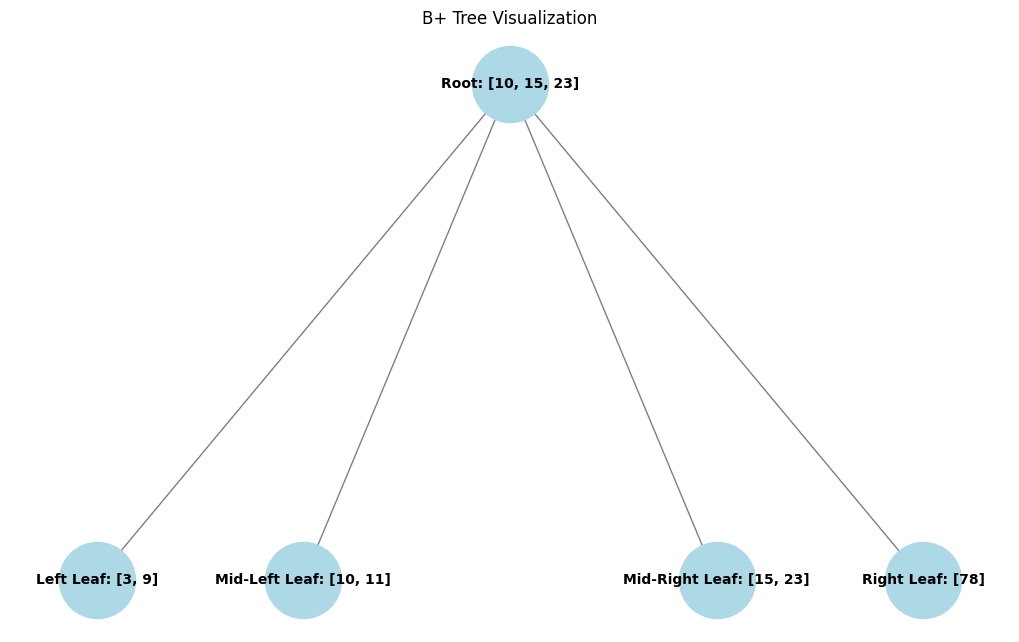

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# สร้างกราฟ B+ Tree ด้วย NetworkX
G = nx.Graph()

# เพิ่มโหนดใน B+ Tree
nodes = {
    "Root": "Root: [10, 15, 23]",
    "Left Leaf": "Left Leaf: [3, 9]",
    "Mid-Left Leaf": "Mid-Left Leaf: [10, 11]",
    "Mid-Right Leaf": "Mid-Right Leaf: [15, 23]",
    "Right Leaf": "Right Leaf: [78]"
}

# เพิ่มโหนดในกราฟ
for node in nodes.values():
    G.add_node(node)

# เพิ่มเส้นเชื่อม (Edges) ระหว่างโหนด
edges = [
    (nodes["Root"], nodes["Left Leaf"]),
    (nodes["Root"], nodes["Mid-Left Leaf"]),
    (nodes["Root"], nodes["Mid-Right Leaf"]),
    (nodes["Root"], nodes["Right Leaf"])
]
G.add_edges_from(edges)

# วาดกราฟ
plt.figure(figsize=(10, 6))
pos = {
    nodes["Root"]: (0.5, 1),
    nodes["Left Leaf"]: (0.1, 0.5),
    nodes["Mid-Left Leaf"]: (0.3, 0.5),
    nodes["Mid-Right Leaf"]: (0.7, 0.5),
    nodes["Right Leaf"]: (0.9, 0.5)
}
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", font_color="black", edge_color="gray")
plt.title("B+ Tree Visualization")
plt.show()


In [4]:
class Node:
    def __init__(self, is_leaf=False):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf
        self.next = None  # ใช้เชื่อมต่อโหนดใบ (Leaf nodes)

class BPlusTree:
    def __init__(self, max_keys=3):
        self.root = Node(is_leaf=True)
        self.max_keys = max_keys

    def insert(self, key):
        root = self.root
        if len(root.keys) == self.max_keys:
            # ถ้าโหนดรากเต็ม ให้แยกโหนดรากและเพิ่มระดับของต้นไม้
            new_root = Node()
            new_root.children.append(root)
            self.split_child(new_root, 0)
            self.root = new_root
        self._insert_non_full(self.root, key)

    def split_child(self, parent, index):
        # ฟังก์ชันแยกโหนดลูก
        node_to_split = parent.children[index]
        mid_index = len(node_to_split.keys) // 2
        split_key = node_to_split.keys[mid_index]

        # สร้างโหนดใหม่ที่แบ่งออกมา
        new_node = Node(is_leaf=node_to_split.is_leaf)
        new_node.keys = node_to_split.keys[mid_index + 1:]
        node_to_split.keys = node_to_split.keys[:mid_index]

        if not node_to_split.is_leaf:
            new_node.children = node_to_split.children[mid_index + 1:]
            node_to_split.children = node_to_split.children[:mid_index + 1]
        else:
            # ถ้าเป็นโหนดใบ ให้เชื่อมต่อโหนดใบใหม่กับโหนดใบที่แบ่งออกมา
            new_node.next = node_to_split.next
            node_to_split.next = new_node

        # เพิ่ม split_key ในโหนดพาเรนท์
        parent.keys.insert(index, split_key)
        parent.children.insert(index + 1, new_node)

    def _insert_non_full(self, node, key):
        # ฟังก์ชันแทรกคีย์เมื่อโหนดไม่เต็ม
        if node.is_leaf:
            # ถ้าเป็นโหนดใบ ให้แทรกคีย์ที่ตำแหน่งที่ถูกต้อง
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1
            node.keys.insert(index, key)
        else:
            # หาโหนดลูกที่ถูกต้องในการแทรกคีย์
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1

            # ถ้าโหนดลูกเต็ม ให้แยกโหนดลูกก่อนแทรก
            if len(node.children[index].keys) == self.max_keys:
                self.split_child(node, index)
                if key > node.keys[index]:
                    index += 1
            self._insert_non_full(node.children[index], key)

    def display(self):
        # ฟังก์ชันแสดงโครงสร้างต้นไม้
        levels = []
        self._display_helper(self.root, 0, levels)
        for level, nodes in enumerate(levels):
            print(f"Level {level}: ", end="")
            for node in nodes:
                print(node.keys, end=" ")
            print()

    def _display_helper(self, node, level, levels):
        if len(levels) == level:
            levels.append([])
        levels[level].append(node)
        if not node.is_leaf:
            for child in node.children:
                self._display_helper(child, level + 1, levels)

# ตัวอย่างการใช้งาน
bptree = BPlusTree(max_keys=3)
keys = [15, 23, 9, 10, 11, 78, 3]

for key in keys:
    print(f"Inserting {key}:")
    bptree.insert(key)
    bptree.display()
    print("-" * 30)


Inserting 15:
Level 0: [15] 
------------------------------
Inserting 23:
Level 0: [15, 23] 
------------------------------
Inserting 9:
Level 0: [9, 15, 23] 
------------------------------
Inserting 10:
Level 0: [15] 
Level 1: [9, 10] [23] 
------------------------------
Inserting 11:
Level 0: [15] 
Level 1: [9, 10, 11] [23] 
------------------------------
Inserting 78:
Level 0: [15] 
Level 1: [9, 10, 11] [23, 78] 
------------------------------
Inserting 3:
Level 0: [10, 15] 
Level 1: [3, 9] [11] [23, 78] 
------------------------------


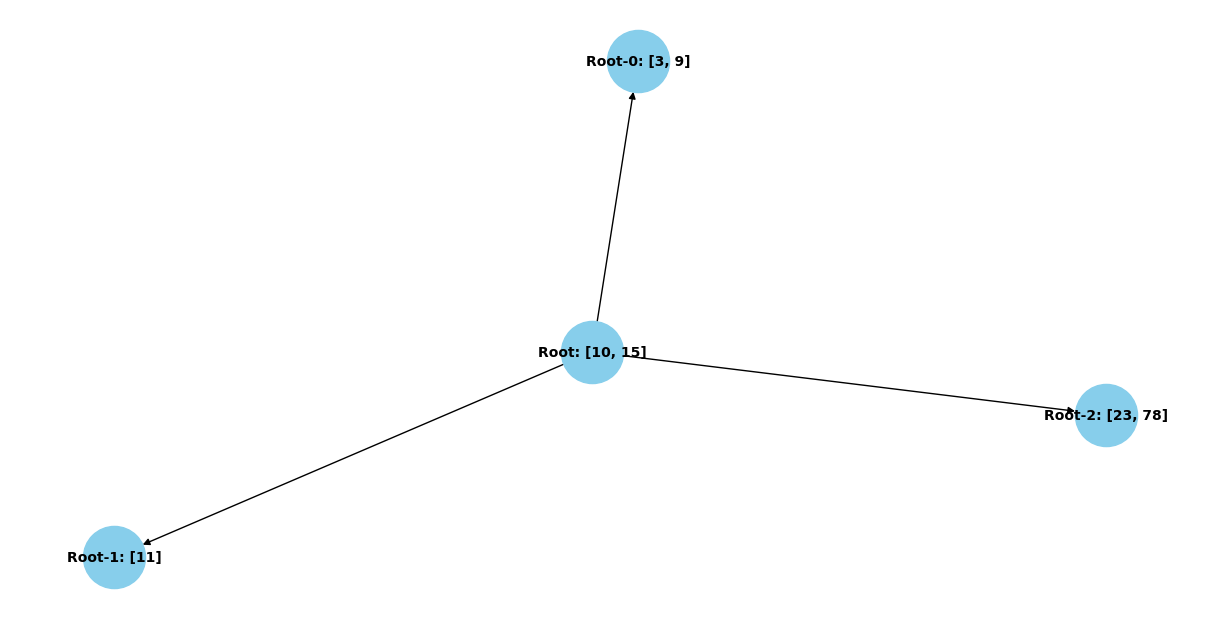

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, is_leaf=False):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf
        self.next = None  # ใช้เชื่อมต่อโหนดใบ (Leaf nodes)

class BPlusTree:
    def __init__(self, max_keys=3):
        self.root = Node(is_leaf=True)
        self.max_keys = max_keys

    def insert(self, key):
        root = self.root
        if len(root.keys) == self.max_keys:
            # ถ้าโหนดรากเต็ม ให้แยกโหนดรากและเพิ่มระดับของต้นไม้
            new_root = Node()
            new_root.children.append(root)
            self.split_child(new_root, 0)
            self.root = new_root
        self._insert_non_full(self.root, key)

    def split_child(self, parent, index):
        # ฟังก์ชันแยกโหนดลูก
        node_to_split = parent.children[index]
        mid_index = len(node_to_split.keys) // 2
        split_key = node_to_split.keys[mid_index]

        # สร้างโหนดใหม่ที่แบ่งออกมา
        new_node = Node(is_leaf=node_to_split.is_leaf)
        new_node.keys = node_to_split.keys[mid_index + 1:]
        node_to_split.keys = node_to_split.keys[:mid_index]

        if not node_to_split.is_leaf:
            new_node.children = node_to_split.children[mid_index + 1:]
            node_to_split.children = node_to_split.children[:mid_index + 1]
        else:
            # ถ้าเป็นโหนดใบ ให้เชื่อมต่อโหนดใบใหม่กับโหนดใบที่แบ่งออกมา
            new_node.next = node_to_split.next
            node_to_split.next = new_node

        # เพิ่ม split_key ในโหนดพาเรนท์
        parent.keys.insert(index, split_key)
        parent.children.insert(index + 1, new_node)

    def _insert_non_full(self, node, key):
        # ฟังก์ชันแทรกคีย์เมื่อโหนดไม่เต็ม
        if node.is_leaf:
            # ถ้าเป็นโหนดใบ ให้แทรกคีย์ที่ตำแหน่งที่ถูกต้อง
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1
            node.keys.insert(index, key)
        else:
            # หาโหนดลูกที่ถูกต้องในการแทรกคีย์
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1

            # ถ้าโหนดลูกเต็ม ให้แยกโหนดลูกก่อนแทรก
            if len(node.children[index].keys) == self.max_keys:
                self.split_child(node, index)
                if key > node.keys[index]:
                    index += 1
            self._insert_non_full(node.children[index], key)

    def display_tree(self):
        # สร้างกราฟด้วย networkx และ matplotlib
        G = nx.DiGraph()
        self._add_edges(self.root, G, "Root")
        
        pos = nx.spring_layout(G)  # จัดตำแหน่งโหนด
        plt.figure(figsize=(12, 6))
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
        plt.show()

    def _add_edges(self, node, G, label):
        # เพิ่มโหนดและขอบลงในกราฟ
        if node.is_leaf:
            node_label = f"{label}: {node.keys}"
            G.add_node(node_label)
        else:
            node_label = f"{label}: {node.keys}"
            G.add_node(node_label)
            for i, child in enumerate(node.children):
                child_label = f"{label}-{i}"
                G.add_edge(node_label, f"{child_label}: {child.keys}")
                self._add_edges(child, G, child_label)

# ตัวอย่างการใช้งาน
bptree = BPlusTree(max_keys=3)
keys = [15, 23, 9, 10, 11, 78, 3]

for key in keys:
    bptree.insert(key)

bptree.display_tree()
